# Chapter 2: Rule-Based AI: Tic Tac Toe

In this chapter, you’ll first create a game environment for Tic Tac Toe. You'll hard code in some rules to make the AI player think up to three steps ahead. You'll then deploy the strategies against a random player and see how effective they are. Coding in rule-based AI in Tic Tac Toe in this book serves at least four purposes. First, you'll learn how to build an AI agent that can think up to three steps ahead and generalize the logic to other games or real-world situations. Second, it introduces you to the game environment of Tic Tac Toe, as we'll use this game to study other AI algorithms later in this book, such as MiniMax, Monte Carlo Tree Search, Actor-Critic, and so on. Third, in AlphaGo, the agent learns from playing against stronger players, and we'll use the AI players created in this chapter as opponents when we discuss AlphaGo strategies. Fourth, later in this book, we'll use rule-based AI to test how effective a certain game strategy is; that is, we'll use rule-based AI as our benchmark when testing the effectiveness of various game strategies (such as an AlphaGo agent).

To build an AI player who can think one step ahead, we iterate through all possible next moves and check if any one of them leads to winning the game right away. If yes, the AI player will take the move. 

Thinking two steps ahead means that the AI player tries to prevent the opponent from winning the next turn. The program iterates through all combinations of next two moves and see if there is a combination that leads to a win for the opponent. If yes, the AI player blocks the opponent's move. 

By thinking three steps ahead, the AI player follows the path that most likely leads to a victory after three moves. In many scenarios, thinking three steps ahead can guarantee a win for the AI player in three steps. 

***
$\mathbf{\text{Create a subfolder for files in Chapter 2}}$<br>
***
We'll put all files in Chapter 2 in a subfolder /files/ch02. Run the code in the cell below to create the subfolder.

***

In [1]:
import os

os.makedirs("files/ch02", exist_ok=True)

# 1. Create the Tic Tac Toe Game Environment
We'll create a Tic Tac Toe game environment, using the *turtle* library to draw game boards. We’ll create all the features and methods that a typical OpenAI Gym environment has. 

## 1.1. Use A Python Class to Represent the Environment
We’ll create a Python class to represent the Tic Tac Toe game environment. The class will have various attributes and methods to replicate those in a typical OpenAI Gym game environment. 

#### Attributes
Specifically, our self-made Tic Tac Toe game environment will have the following attributes:
 
*	action_space: an attribute that provides the space of all actions that can be taken by the agent. The action space will have nine values, 1 to 9. We use 1 to 9 instead of 0 to 8 to avoid confusion.
*	observation_space: an attribute that provides the list of all possible states in the environment. We'll use a numpy array with 9 values to represent the nine cell on a game board.
*	state: an attribute indicating which state the agent is currently in. Each of the nine cells can take values -1 (occupied by player O), 0 (empty), or 1 (occupied by player X).
*	action: an attribute indicating the action taken by the agent. The action is a number between 1 and 9.
*	reward: is an attribute indicating the reward to the agent because of the action taken by the agent. The reward is 0 in each step, unless a player has won the game, in which case the winner has a reward of 1 and the loser a reward of -1. 
*	done: an attribute indicating whether the game has ended. This happens when one player wins or if the game is tied.
*	info: an attribute that provides information about the game. We'll set it as an empty string "". 

#### Methods
Our self-made Tic Tac Toe game environment will have a few methods as well:
 
*	reset() is a method to set the game environment to the initial (that is, the starting) state. All cells on the board will be empty.
*	render() is a method showing the current state of the environment graphically.
*	step() is a method that returns the new state, the reward, the value of *done* variable, and the variable *info* based on the action taken by the agent.
*	sample() is a method to randomly choose an action from the action space.
*	close() is a method to end the game environment.

## 1.2. Create A Local Module for the Tic Tac Toe Game
We'll create a local module for the Tic Tac Toe game and place it inside the local package for this book: the package ***utils*** that we have created in Chapter 1.

Now let's code in a self-made Tic Tac Toe game environment using a Python class. Save the code in the cell below as *ttt_env.py* in the folder *utils* you created in Chapter 1. Alternatively, you can download it from my GitHub repository. 

In [2]:
import turtle as t
from random import choice
import numpy as np
import time

# Define an action_space helper class
class action_space:
    def __init__(self, n):
        self.n = n
    def sample(self):
        num = np.random.choice(range(self.n))
        # covert to 1 to 9
        action = 1+num
        return action
    
# Define an obervation_space helper class    
class observation_space:
    def __init__(self, n):
        self.shape = (n,)

class ttt():
    def __init__(self): 
        # use the helper action_space class
        self.action_space=action_space(9)
        # use the helper observation_space class
        self.observation_space=observation_space(9)
        self.info=""  
        self.showboard=False          
        # Create a dictionary to map cell number to coordinates
        self.cellcenter = {1:(-200,-200), 2:(0,-200), 3:(200,-200),
                    4:(-200,0), 5:(0,0), 6:(200,0),
                    7:(-200,200), 8:(0,200), 9:(200,200)} 


    def reset(self):  
        # The X player moves first
        self.turn = "X"
        # Count how many rounds played
        self.rounds = 1
        # Create a list of valid moves
        self.validinputs = list(self.cellcenter.keys())
        # Create a dictionary of moves made by each player
        self.occupied = {"X":[],"O":[]}
        # Tracking the state
        self.state=np.array([0,0,0,0,0,0,0,0,0])
        self.done=False
        self.reward=0     
        return self.state        
        
    # step() function: place piece on board and update state
    def step(self, inp):
        # Add the move to the occupied list 
        self.occupied[self.turn].append(inp)
        # update the state: X is 1 and O is -1
        self.state[int(inp)-1]=2*(self.turn=="X")-1
        # Disallow the move in future rounds
        self.validinputs.remove(inp) 
        # check if the player has won the game
        if self.win_game() == True:
            self.done=True
            # reward is 1 if X won; -1 if O won
            self.reward=2*(self.turn=="X")-1
            self.validinputs=[]
        # If all cellls are occupied and no winner, it's a tie
        elif self.rounds == 9:
            self.done=True
            self.reward=0
            self.validinputs=[]
        # Counting rounds
        self.rounds += 1
        # Give the turn to the other player
        if self.turn == "X":
            self.turn = "O"
        else:
            self.turn = "X"             
        return self.state, self.reward, self.done, self.info
                    
    # Determine if a player has won the game
    def win_game(self):
        lst = self.occupied[self.turn]
        if 1 in lst and 2 in lst and 3 in lst:
            return True
        elif 4 in lst and 5 in lst and 6 in lst:
            return True        
        elif 7 in lst and 8 in lst and 9 in lst:
            return True        
        elif 1 in lst and 4 in lst and 7 in lst:
            return True
        elif 2 in lst and 5 in lst and 8 in lst:
            return True
        elif 3 in lst and 6 in lst and 9 in lst:
            return True
        elif 1 in lst and 5 in lst and 9 in lst:
            return True
        elif 3 in lst and 5 in lst and 7 in lst:
            return True
        else:
            return False


    def display_board(self):
        # Set up the screen
        try:
            t.setup(630,630,10,70) 
        except t.Terminator:
            t.setup(630,630,10,70)   
        t.tracer(False)
        t.hideturtle()
        t.bgcolor("azure")
        t.title("Tic-Tac-Toe in Turtle Graphics")
        # Draw horizontal lines and vertical lines
        t.pensize(5)
        t.color('blue')
        for i in (-300,-100,100,300):  
            t.up()
            t.goto(i,-300)
            t.down()
            t.goto(i,300)
            t.up()
            t.goto(-300,i)
            t.down()
            t.goto(300,i)
            t.up()
        # Write down the cell number
        t.color('red')
        for cell, center in list(self.cellcenter.items()):
            t.goto(center[0]-80,center[1]-80)
            t.write(cell,font = ('Arial',20,'normal'))

    def render(self):
        if self.showboard==False:
            self.display_board()
            self.showboard=True   
        # Place X or O in occupied cells
        t.color('light gray')
        if len(self.occupied["X"])>0:
            for x in self.occupied["X"]:
                xy=self.cellcenter[x]
                t.up()
                t.goto(xy[0]-60,xy[1]-60)
                t.down()               
                t.goto(xy[0]+60,xy[1]+60)
                t.up()
                t.goto(xy[0]-60,xy[1]+60)
                t.down()               
                t.goto(xy[0]+60,xy[1]-60)
                t.up()    
                t.update()
        if len(self.occupied["O"])>0:                
            for o in self.occupied["O"]:
                t.up()
                t.goto(self.cellcenter[o])
                t.dot(160,"light gray") 
                t.update()

    def close(self):
        time.sleep(1)
        try:
            t.bye()
        except t.Terminator:
            print('exit turtle')

If you run the above cell, nothing will happen. The class simply creates a game environment. We need to initiate the game environment and start playing using Python programs, just as you do with an OpenAI Gym game environment. We'll do that in the next subsection.

## 1.3. Verify the Custom-Made Game Environment
Next, we'll check the attributes and methods of the self-made game environment and make sure it has all the elements that are provided by a typical OpenAI Gym game environment. 

First we'll initiate the game environment and show the game board.

In [3]:
from utils.ttt_env import ttt

env = ttt()
env.reset()                    
env.render()

You should see a separate turtle window, with a game board as follows: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/ttt_start.png" />

If you want to close the game board window, use the *close()* method, like so:

In [4]:
env.close()

Next, we'll check the attributes of the environment such as the observation space and action space. 

In [5]:
env=ttt()
# check the action space
number_actions=env.action_space.n
print("the number of possible actions are",number_actions)
# sample the action space ten times
print("the following are ten sample actions")
for i in range(10):
   print(env.action_space.sample())
# check the shape of the observation space
print("the shape of the observation space is",\
      env.observation_space.shape)

the number of possible actions are 9
the following are ten sample actions
4
1
7
3
8
8
1
6
3
5
the shape of the observation space is (9,)


The meanings of the actions in this game as follows
* 1: Placing a game piece in cell 1
* 2: Placing a game piece in cell 2
* ...
* 9: Placing a game piece in cell 9


The state space is a vector with 9 values: 
* 0 means it's empty; 
* -1 means it's occupied by player O; 
* 1 means it's occupied by player X.

# 2. Play Games in the Tic Tac Toe Environment
Next, we'll play games in the custom-made environment. You'll learn to save each game board as a picture. Finally, you'll record all game boards in a full game, and convert them into an animation.

## 2.1. Play a full game

Here we'll play a full game, by randomly choosing an action from the action space each step.

In [6]:
import time
import random

# Initiate the game environment
env=ttt()
state=env.reset()   
env.render()
# Play a full game manually
while True:
    print(f"the current state is \n{state.reshape(3,3)}")    
    action = random.choice(env.validinputs)
    time.sleep(1)
    print(f"Player X has chosen action={action}")    
    state, reward, done, info = env.step(action)
    env.render()
    if done:
        if reward==1:
            print(f"Player X has won!") 
        else:
            print(f"It's a tie!") 
        break
    print(f"the current state is \n{state.reshape(3,3)}")    
    action = random.choice(env.validinputs)
    time.sleep(1)
    print(f"Player O has chosen action={action}")    
    state, reward, done, info = env.step(action)
    env.render()
    if done:
        print(f"Player O has won!") 
        break  
env.close()      

the current state is state=
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Player X has chosen action=7
the current state is state=
[[0 0 0]
 [0 0 0]
 [1 0 0]]
Player O has chosen action=6
the current state is state=
[[ 0  0  0]
 [ 0  0 -1]
 [ 1  0  0]]
Player X has chosen action=9
the current state is state=
[[ 0  0  0]
 [ 0  0 -1]
 [ 1  0  1]]
Player O has chosen action=4
the current state is state=
[[ 0  0  0]
 [-1  0 -1]
 [ 1  0  1]]
Player X has chosen action=5
the current state is state=
[[ 0  0  0]
 [-1  1 -1]
 [ 1  0  1]]
Player O has chosen action=8
the current state is state=
[[ 0  0  0]
 [-1  1 -1]
 [ 1 -1  1]]
Player X has chosen action=2
the current state is state=
[[ 0  1  0]
 [-1  1 -1]
 [ 1 -1  1]]
Player O has chosen action=3
the current state is state=
[[ 0  1 -1]
 [-1  1 -1]
 [ 1 -1  1]]
Player X has chosen action=1
Player X has won!


Note that the outcome is different each time you run it because the actions are randomly chosen.

## 2.2. Play the Game Manually
Next, you’ll learn how to manually interact with the Tic Tac Toe game. You'll use the key board to enter a number between 1 and 9. The following lines of code show you how.

In [7]:
state=env.reset()   
print("enter a move in the form of 1 to 9")

# Play a full game manually
while True:
    print(f"the current state is \n{state.reshape(3,3)}")   
    action=int(input("Player X, what's your move?\n"))
    print(f"Player X has chosen action={action}")    
    state, reward, done, info = env.step(action)
    if done:
        if reward==1:
            print(f"Player X has won!") 
        else:
            print(f"It's a tie!") 
        break
    print(f"the current state is \n{state.reshape(3,3)}")    
    action=int(input("Player O, what's your move?\n"))
    print(f"Player O has chosen action={action}")    
    state, reward, done, info = env.step(action)
    if done:
        print(f"Player O has won!") 
        break   
env.close()

enter a move in the form of 1 to 9
the current state is state=
[[0 0 0]
 [0 0 0]
 [0 0 0]]
Player X, what's your move?
5
Player X has chosen action=5
the current state is state=
[[0 0 0]
 [0 1 0]
 [0 0 0]]
Player O, what's your move?
1
Player O has chosen action=1
the current state is state=
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  0]]
Player X, what's your move?
7
Player X has chosen action=7
the current state is state=
[[-1  0  0]
 [ 0  1  0]
 [ 1  0  0]]
Player O, what's your move?
2
Player O has chosen action=2
the current state is state=
[[-1 -1  0]
 [ 0  1  0]
 [ 1  0  0]]
Player X, what's your move?
3
Player X has chosen action=3
Player X has won!


# 3. Think One Step Ahead
To think one step ahead, the AI player will iterate through all possible next moves and check if any one of them leads to a win right away. If yes, the AI player will take the move. Otherwise, the AI player randomly selects a move. 

We'll first code in such an AI player. We'll then test the efficacy of the game strategy by letting it play against random moves and see how often the AI player wins. 

## 3.1. Create an AI Player Who Thinks One Step Ahead
We define a function AI_think1(). The function checks if there is a move that wins the game for the AI player right away. If yes, it returns the move. Otherwise, the function returns a value of None. 

Run the following code cell to define the function:

In [8]:
from copy import deepcopy

def AI_think1():
    # iterate through all possible next moves
    for m in env.validinputs:
        # make hypothetical moves
        env_copy=deepcopy(env)
        new_state, reward, done, info = env_copy.step(m) 
        # if the reward is 1 or -1, then the player wins
        if done and abs(reward)==1:
            return m                  
    return None

Note that we have made the function general in the sense that it applies to both player X and player O. 

Next, we'll play against the AI player and make sure it's working the way we intended it to do. 

## 3.2. Play against the Think-One-Step-Ahead AI
To play against the AI we just created, we define the following AI_vs_manual(player_function) function. 

In [9]:
def AI_vs_manual(player_function):
    manual=input("Do you want to be player X or O?")
    if manual=="X" or manual=="x":
        player="X"
    if manual=="O" or manual=="o":
        player="O"    
    state=env.reset()
    print(f"the current state is \n{state.reshape(3,3)}")
    # if you chose X, you move first
    if player=="X":
        move=input("enter your move:")
        state,reward,done,_=env.step(int(move))
        print(f"you have chosen move {move}")    
    while True:       
        # AI moves
        AI_move=player_function()
        if AI_move==None:
            AI_move=random.choice(env.validinputs)
        state,reward,done,_=env.step(AI_move)
        print(f"AI has chosen move {AI_move}")
        print(f"the current state is \n{state.reshape(3,3)}")
        if done and reward!=0:
            print("the AI player won")
            break
        if done and reward==0:
            print("game over; it's a tie") 
            break               
        move=input("enter your move:")
        state,reward,done,_=env.step(int(move))
        print(f"you have chosen move {move}")       
        if done and reward!=0:
            print("the human player won")
            break
        if done and reward==0:
            print("game over; it's a tie")
            break  

The argument in the function, *player_function*, is a function name object in Python. Later when we have AI players such as AI_think2() or AI_think3(), we can also put it inside the AI_vs_manual() as an argument and play against those AI players manually. 

The function first ask whether you want to be player X or player O. If you enter X, you'll play first. Otherwise, you'll play second. 

Below, I call the AI_vs_manual() function and put AI_think1 as the argment, like so:

In [10]:
AI_vs_manual(AI_think1)

Do you want to be player X or O?X
the current state is state=
[[0 0 0]
 [0 0 0]
 [0 0 0]]
enter your move:5
you have chosen move 5
AI has chosen move 4
the current state is state=
[[ 0  0  0]
 [-1  1  0]
 [ 0  0  0]]
enter your move:6
you have chosen move 6
AI has chosen move 1
the current state is state=
[[-1  0  0]
 [-1  1  1]
 [ 0  0  0]]
enter your move:2
you have chosen move 2
AI has chosen move 7
the current state is state=
[[-1  1  0]
 [-1  1  1]
 [-1  0  0]]
the AI player won


As you can see above, the AI player takes the winning move 7 and wins the game. 

As an exercise, you can call the AI_vs_manual() and use AI_think1 as its argument and play game with the AI player. Choose O at the beginning so that the AI player goes first. Create a chance for the AI to win and see if the AI player takes the winning move right away. 

***
$\mathbf{\text{Difference between Function Name and Calling of a Function}}$<br>
***
Pay attention to the difference between a function name and the calling of a function.
For example, AI_think1 is just a function name, while AI_think() calls the
function and executes all command lines in it. What a difference the parentheses make!

***

## 3.3. Test the Efficacy of the Think-One-Step-Ahead AI
Below, we'll define a function to simulate a game between two players, player 1 and player 2. The function returns the results of the game: 1 if player 1 wins, -1 if player 2 wins, and 0 if it's a tie. 

In [11]:
def test_a_game(player1,player2):   
    env.reset()   
    while True:       
        move=player1()
        if move==None:
            move=random.choice(env.validinputs)
        state,reward,done,_=env.step(move)
        if done:
            return reward            
        move=player2()
        if move==None:
            move=random.choice(env.validinputs)
        state,reward,done,_=env.step(move)
        if done:
            return reward 

Since we'll let the AI player play against a player who makes random moves, we'll also define a random_player() function below:

In [12]:
def random_player():               
    return random.choice(env.validinputs)

We create a list *results* to store game outcomes. We simulate 1000 games and half the time, the AI player moves first and the other half, the AI player moves second. Whenever the AI player moves second, we multiple the outcome by -1 so that when a value 1 in the list *results* indicates that the AI player has won and the random player has lost. 

In [13]:
results=[]
for i in range(1000):
    # AI moves first if i is an even number
    if i%2==0:
        result=test_a_game(AI_think1,random_player)
        # record game outcome
        results.append(result)
    # AI moves second if i is an odd number
    else:
        result=test_a_game(random_player,AI_think1)
        # record negative of game outcome
        results.append(-result)

We iterate i from 0 to 999. Whenever i is an even number, we simulate a game and let the AI player move first. The outcome is added to the list *results*: 1 means the first player (the AI player in this case) wins and -1 means the second player wins. Whenever i is an odd number, we simulate a game and let the random player move first. We then multiply the outcome by -1 so that 1 means the AI player has won. 

Run the above code cells so that we simulate 1000 games and get the outcome.

Next, we count how many times the AI player has won by counting the number of 1s in the list *results*. Similarly, the number of -1s is the number of times the AI player has lost. Like so:

In [14]:
# count how many times AI player has won
wins=results.count(1)
print(f"the AI player has won {wins} games")
# count how many times AI player has lost
losses=results.count(-1)
print(f"the AI player has lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} games")

the AI player has won 653 games
the AI player has lost 272 games
the game has tied 75 games


Results show that the AI player has won 653 out of the 100 games; it has lost to the random player 272 times. There are a total of 75 tie games. This indicates that the think-one-step-ahead AI player is clearly better than a random player. 

# 4. Think Two Steps Ahead
To think two step ahead, the AI player first checks if any of the next moves leads to a win right away. If yes, the AI player takes the move. If not, the AI player checks if there is a combination of two moves (one for the AI player and one for the opponent) that leads to a win for the opponent. If yes, the AI player blocks the opponent's winning move. Otherwise, the AI player randomly selects a move. 

We'll first code in such an AI player who thinks two steps ahead. We'll then test the efficacy of the game strategy by letting it play against the AI player who thinks one step ahead and see how often the new AI player wins. 

## 4.1. Create an AI Player Who Thinks Two Steps Ahead
We define a function AI_think2(). The function first checks if there is a move that wins the game for the AI player right away. If yes, it returns the move. Otherwise, the function checks if the opponent has a winning move two steps ahead. If yes, it blocks the opponents' move. Otherwise, it returns a value of None. 

Run the following code cell to define the function:

In [15]:
def AI_think2():
    # See if there is a winning move 
    winner=AI_think1()
    # if yes, take it
    if winner is not None:
        return winner
    # otherwise, iterate through all possible next two moves
    for m1 in env.validinputs:
        for m2 in env.validinputs:
            if m1!=m2:
                env_copy=deepcopy(env)
                s,r,done,_=env_copy.step(m1) 
                s,r,done,_=env_copy.step(m2)                     
                # block your opponent's winning move
                if done and r!=0:
                    return m2 
    # otherwise, return None               
    return None

The function is applies to both player X and player O. 

Next, we'll play against the think-two-steps-ahead AI player and make sure it's working the way we intended it to do. 

## 3.2. Play against the Think-Two-Steps-Ahead AI
To play against the think-two-steps-ahead AI we just created, we use define the AI_vs_manual() function we have created before to play a game manually. 

We'll use AI_think2 as the argument in the AI_vs_manual() function. I'll choose to be player O this time.

In [16]:
AI_vs_manual(AI_think2)

Do you want to be player X or O?O
the current state is state=
[[0 0 0]
 [0 0 0]
 [0 0 0]]
AI has chosen move 8
the current state is state=
[[0 0 0]
 [0 0 0]
 [0 1 0]]
enter your move:5
you have chosen move 5
AI has chosen move 4
the current state is state=
[[ 0  0  0]
 [ 1 -1  0]
 [ 0  1  0]]
enter your move:7
you have chosen move 7
AI has chosen move 3
the current state is state=
[[ 0  0  1]
 [ 1 -1  0]
 [-1  1  0]]
enter your move:2
you have chosen move 2
AI has chosen move 1
the current state is state=
[[ 1 -1  1]
 [ 1 -1  0]
 [-1  1  0]]
enter your move:9
you have chosen move 9
AI has chosen move 6
the current state is state=
[[ 1 -1  1]
 [ 1 -1  1]
 [-1  1 -1]]
game over; it's a tie


As you can see above, when I have pieces in cells 5 and 7, the AI player blocks cell 3 to prevent me from winning the game. Looks like the AI_player2() function can indeed think two steps ahead and block the opponent's winning move.  

As an exercise, you can call the AI_vs_manual() and use AI_think2 as its argument and play a game with the AI player. Choose X at the beginning so that the AI player goes second. Create a winning opportunity for yourself and see if the AI blocks your winning move. 

## 4.3. Test the Efficacy of the Think-Two-Steps-Ahead AI
Below, we'll the test_a_game() function to test the efficacy of the think-two-steps-ahead AI against the think-one-step-ahead AI. 

We again create an empty list *results* to store game outcomes. We simulate 1000 games. Half the time, the think-one-step-ahead AI player moves first and the other half of the time, the think-two-steps-ahead AI player moves first. This way, one player has a first-mover advantage. second. Whenever the think-two-steps-aheadAI player moves second, we multiple the outcome by -1 so that when a value 1 in the list *results* indicates that the think-two-steps-ahead AI player has won and the think-one-step-ahead AI player has lost. 

In [17]:
results=[]
for i in range(1000):
    # think-two-steps-ahead AI moves first at even i
    if i%2==0:
        result=test_a_game(AI_think2,AI_think1)
        # record game outcome
        results.append(result)
    # AI moves second if i is an odd number
    else:
        result=test_a_game(AI_think1,AI_think2)
        # record negative of game outcome
        results.append(-result)

We iterate i from 0 to 999. Whenever i is an even number, we simulate a game and let the think-two-steps-ahead AI player move first. The outcome is added to the list *results*: 1 means the think-two-steps-ahead player wins and -1 means the think-one-step-ahead AI player wins. Whenever i is an odd number, we simulate a game and let the think-one-step-ahead AI player move first. We then multiply the outcome by -1 so that 1 means the think-two-steps-ahead AI player has won. 

Run the above code cells so that we simulate 1000 games and get the outcome.

Next, we count how many times the think-two-steps-ahead AI player has won by counting the number of 1s in the list *results*. Similarly, the number of -1s is the number of times the think-two-steps-ahead AI player has lost. Like so:

In [18]:
# count how many times AI player has won
wins=results.count(1)
print(f"the think-two-steps-ahead AI player has won {wins} games")
# count how many times AI player has lost
losses=results.count(-1)
print(f"the think-two-steps-ahead AI player has lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} games")

the think-two-steps-ahead AI player has won 773 games
the think-two-steps-ahead AI player has lost 90 games
the game has tied 137 games


Results show that the think-two-steps-ahead AI player has won 773 out of the 1000 games; it has lost to the think-one-step-ahead player 90 times. There are a total of 137 tie games. This indicates that the think-two-step-ahead AI player is clearly better than the think-one-step-ahead AI player. 

# 5. Think Three Steps Ahead
This next section will allow the AI player to think up to three steps ahead before taking its turn. If the AI player has no winning move in the next step and the opponent has no winning moves two steps ahead, the AI player will look three steps ahead.
It will take the next move that most likely leads to a win in three steps. In particular, if there’s a next move that guarantees the AI player to win in three steps, the AI palyer will select that next move as the best one.
Let’s use an example to demonstrate.

## 5.1. An Example of Winning in Three Steps
Consider the example as illustrated in the figure below. Player X to move, and if it choose cell 2 as its next move, it can create a double attack and gurantee a win in three steps: Player X can win by placing a piece in cell 3 or cell 8 in three steps and win the game. Player O can either block cell 3 or cell 8, but not both. 

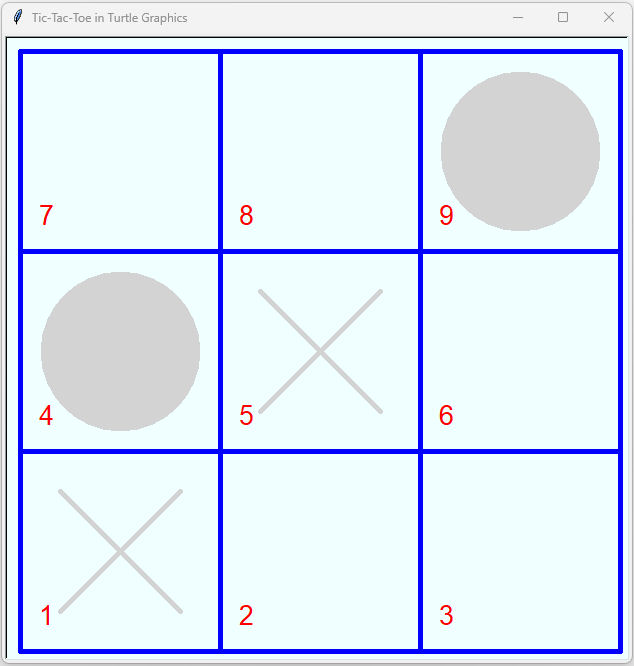 

## 5.2. Create an AI Player Who Thinks Three Steps Ahead
We define a function AI_think3(). The function checks if there is a move that wins the game for the AI player right away or if the opponent has a winning move two steps ahead. If not, the player looks three steps ahead and choose the move that most likely leads to a win.  

Run the following code cell to define the function:

In [19]:
def AI_think3():
    # See if there is a winning move 
    winner=AI_think1()
    # if yes, take it
    if winner is not None:
        return winner
    # check if opponent has a winning move
    loser=AI_think2()
    # if yes, block it
    if loser is not None:
        return loser
    # look three steps ahead
    w3=[]
    for m1 in env.validinputs:
        for m2 in env.validinputs:
            for m3 in env.validinputs:
                if m1!=m2 and m1!=m3 and m2!=m3:
                    env_copy=deepcopy(env)
                    s,r,done,_=env_copy.step(m1) 
                    s,r,done,_=env_copy.step(m2)   
                    s,r,done,_=env_copy.step(m3)                    
                    if done and r!=0:
                        w3.append(m1) 
    # Choose the most frequent winner
    if len(w3)>0:
        return max(set(w3),key=w3.count)                
    # Return None otherwise
    return None

The function is applies to both player X and player O. 

Next, we'll play against the think-two-steps-ahead AI player and make sure it's working the way we intended it to do. 

## 5.3. Play against the Think-Three-Steps-Ahead AI
To play against the think-three-steps-ahead AI we just created, we use define the AI_vs_manual() function we have created before to play a game manually. 

We'll use AI_think3 as the argument in the AI_vs_manual() function. I'll choose to be player O and create an opportunity for Player X to have a double attack.

In [20]:
AI_vs_manual(AI_think3)

Do you want to be player X or O?O
the current state is state=
[[0 0 0]
 [0 0 0]
 [0 0 0]]
AI has chosen move 4
the current state is state=
[[0 0 0]
 [1 0 0]
 [0 0 0]]
enter your move:2
you have chosen move 2
AI has chosen move 1
the current state is state=
[[ 1 -1  0]
 [ 1  0  0]
 [ 0  0  0]]
enter your move:7
you have chosen move 7
AI has chosen move 5
the current state is state=
[[ 1 -1  0]
 [ 1  1  0]
 [-1  0  0]]
enter your move:9
you have chosen move 9
AI has chosen move 6
the current state is state=
[[ 1 -1  0]
 [ 1  1  1]
 [-1  0 -1]]
the AI player won


As you can see above, when the AI player places a piece in cell 5, it has created a double attack: it can win through cells 1, 5, 9, or through cells 4, 5, and 6. I can only block cell 6 or cell 9, but not both. So the AI player wins in three steps. 

As an exercise, you can call the AI_vs_manual() and use AI_think3 as its argument and play a game with the AI player. Choose O at the beginning so that the AI player goes first. Create an opportunity for the AI player to have a double attack and see if it indeed places a piece to create a double attack and win in three steps.

## 5.4. Test the Efficacy of the Think-Three-Steps-Ahead AI
Below, we'll the test_a_game() function to test the efficacy of the think-three-steps-ahead AI against the think-two-steps-ahead AI. 

We again create an empty list *results* to store game outcomes. We simulate 1000 games. Half the time, the think-three-steps-ahead AI player moves first and the other half of the time, the think-two-steps-ahead AI player moves first. This way, no player has a first-mover advantage. second. Whenever the think-three-steps-ahead AI player moves second, we multiple the outcome by -1 so that a value 1 in the list *results* indicates that the think-three-steps-ahead AI player has won.

In [21]:
results=[]
for i in range(1000):
    # think-three-steps-ahead AI moves first at even i
    if i%2==0:
        result=test_a_game(AI_think3,AI_think2)
        # record game outcome
        results.append(result)
    # think-three-steps-ahead AI moves second otherwise
    else:
        result=test_a_game(AI_think2,AI_think3)
        # record negative of game outcome
        results.append(-result)

We iterate i from 0 to 999. Whenever i is an even number, we simulate a game and let the think-two-steps-ahead AI player move first. The outcome is added to the list *results*: 1 means the think-two-steps-ahead player wins and -1 means the think-one-step-ahead AI player wins. Whenever i is an odd number, we simulate a game and let the think-one-step-ahead AI player move first. We then multiply the outcome by -1 so that 1 means the think-two-steps-ahead AI player has won. 

Run the above code cells so that we simulate 1000 games and get the outcome.

Next, we count how many times the think-two-steps-ahead AI player has won by counting the number of 1s in the list *results*. Similarly, the number of -1s is the number of times the think-two-steps-ahead AI player has lost. Like so:

In [22]:
# count how many times AI player has won
wins=results.count(1)
print(f"the think-three-steps-ahead AI player has won {wins} games")
# count how many times AI player has lost
losses=results.count(-1)
print(f"the think-three-steps-ahead AI player has lost {losses} games")
# count tie games
ties=results.count(0)
print(f"the game has tied {ties} games")

the think-three-steps-ahead AI player has won 323 games
the think-three-steps-ahead AI player has lost 302 games
the game has tied 375 games


Results show that the think-two-steps-ahead AI player has won 323 out of the 1000 games; it has lost to the think-one-step-ahead player 302 times. There are a total of 375 tie games. This indicates that the think-three-step-ahead AI player is slightly better than the think-two-steps-ahead AI player. 